In [1]:
# MCMCO Test Question 2 and Question 3

In [2]:
# Test Question Q.2

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt

In [3]:
# Data Source: data of EUR/USD exchange rate is downloaded from FRED
# https://fred.stlouisfed.org/series/DEXUSEU

In [4]:
fx_data = pd.read_csv('DEXUSEU.csv').dropna()

In [5]:
fx_data['DEXUSEU'] = pd.to_numeric(fx_data['DEXUSEU'], errors='coerce')

In [6]:
# calculate log return 
fx_data['Log_Return'] = np.log(fx_data['DEXUSEU'] / fx_data['DEXUSEU'].shift(1)).dropna()

In [7]:
# Data Source: data of EFFR is from New York Fed https://www.newyorkfed.org/markets/reference-rates/effr
# data file can be downladed from https://markets.newyorkfed.org/read?startDt=2019-10-18&endDt=2024-10-18&eventCodes=500&productCode=50&sort=postDt:-1,eventCode:1&format=xlsx

In [8]:
effr_url = "https://markets.newyorkfed.org/read?startDt=2019-10-18&endDt=2024-10-18&eventCodes=500&productCode=50&sort=postDt:-1,eventCode:1&format=xlsx"
effr_df = pd.read_excel(effr_url)

/opt/miniconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [9]:
effr_df.head()

,Effective Date,Rate Type,Rate (%),1st Percentile (%),25th Percentile (%),75th Percentile (%),99th Percentile (%),Volume ($Billions),Target Rate From (%),Target Rate To (%),Intra Day - Low (%),Intra Day - High (%),Standard Deviation (%),30-Day Average SOFR,90-Day Average SOFR,180-Day Average SOFR,SOFR Index,Revision Indicator (Y/N),Footnote ID
0,10/18/2024,EFFR,4.83,4.81,4.83,4.84,4.85,98,4.75,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/17/2024,EFFR,4.83,4.81,4.83,4.84,4.85,96,4.75,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/16/2024,EFFR,4.83,4.81,4.83,4.84,4.85,97,4.75,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/15/2024,EFFR,4.83,4.81,4.83,4.84,4.85,91,4.75,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/11/2024,EFFR,4.83,4.81,4.82,4.84,4.85,94,4.75,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
effr_df['DATE'] = pd.to_datetime(effr_df['Effective Date'], format='%m/%d/%Y')
effr_data = pd.concat([effr_df["DATE"], effr_df["Rate (%)"]], axis = 1)
effr_data.rename(columns={"Rate (%)": "Rate"})

,DATE,Rate
0,2024-10-18,4.83
1,2024-10-17,4.83
2,2024-10-16,4.83
3,2024-10-15,4.83
4,2024-10-11,4.83
...,...,...
1252,2019-10-24,1.85
1253,2019-10-23,1.85
1254,2019-10-22,1.85
1255,2019-10-21,1.85


In [11]:
# Convert the DATE columns in both DataFrames to datetime format
fx_data['DATE'] = pd.to_datetime(fx_data['DATE'])
effr_data['DATE'] = pd.to_datetime(effr_data['DATE'])

# Merge
merged_data = pd.merge(fx_data, effr_data, how="inner", on="DATE")
merged_data.dropna(inplace=True)

In [12]:
merged_data.head()

,DATE,DEXUSEU,Log_Return,Rate (%)
1,2019-10-21,1.1145,-0.000897,1.85
2,2019-10-22,1.1138,-0.000628,1.85
3,2019-10-23,1.1118,-0.001797,1.85
4,2019-10-24,1.1098,-0.001801,1.85
5,2019-10-25,1.1081,-0.001533,1.83


In [13]:
log_returns = merged_data['Log_Return']
ffr = merged_data['Rate (%)']

In [14]:
# Define and fit the GARCH model with the Federal Funds Rate as an exogenous variable
model = arch_model(log_returns, vol='Garch', p=1, q=1, mean='AR', lags=2, x=ffr)
garch_fit = model.fit(disp='off')

# Display the summary of the model
print(garch_fit.summary())

                           AR - GARCH Model Results                           
Dep. Variable:             Log_Return   R-squared:                   -2698.524
Mean Model:                        AR   Adj. R-squared:              -2703.061
Vol Model:                      GARCH   Log-Likelihood:               -4607.76
Distribution:                  Normal   AIC:                           9227.53
Method:            Maximum Likelihood   BIC:                           9258.03
                                        No. Observations:                 1193
Date:                Wed, Oct 22 2025   Df Residuals:                     1190
Time:                        11:51:43   Df Model:                            3
                                 Mean Model                                
                    coef    std err          t      P>|t|  95.0% Conf. Int.
---------------------------------------------------------------------------
Const             0.2361  2.059e-02     11.470  1.874e-30 [  

/opt/miniconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.1e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [15]:
# Forecast the conditional variance
forecast = garch_fit.forecast(horizon=1, reindex=False)
conditional_variance = forecast.variance.values[-1, :]

In [16]:
forecast_mean = forecast.mean[-1:]

In [17]:
forecast_mean 

,h.1
1256,0.21044


In [18]:
# Select a specific date for Value at Risk calculation: the last known date
specific_date_index = log_returns.dropna().index[-1]

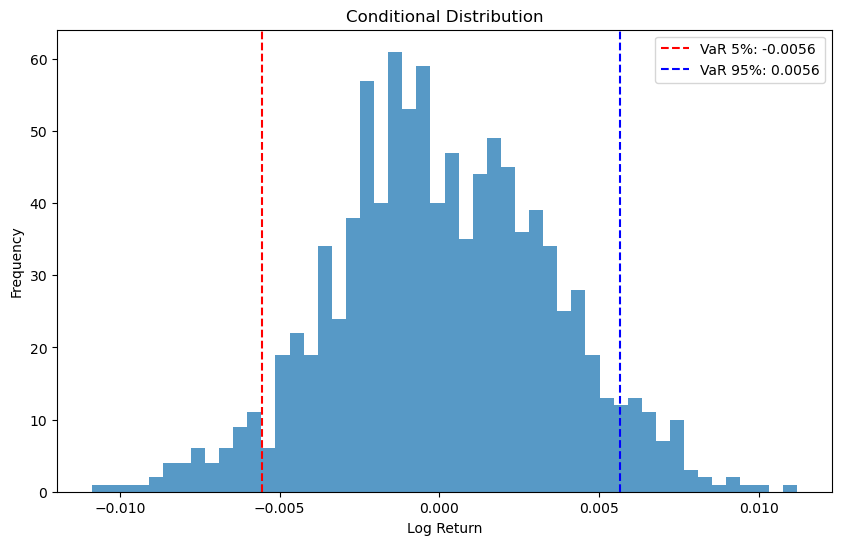

In [20]:
# Calculate VaR at 10% (both tails)
quantile = 0.05  # 10% in total, so 5% in each tail
VaR = np.sqrt(conditional_variance) * np.percentile(np.random.normal(0, 1, 10000), [quantile*100, (1 - quantile)*100])

# Generate random samples from the conditional distribution
simulated_returns = np.random.normal(0, np.sqrt(conditional_variance), 1000)

# Plot the conditional distribution for the specific date
plt.figure(figsize=(10, 6))
plt.hist(simulated_returns, bins=50, alpha=0.75)
plt.axvline(x=VaR[0], color='red', linestyle='--', label=f'VaR 5%: {VaR[0]:.4f}')
plt.axvline(x=VaR[1], color='blue', linestyle='--', label=f'VaR 95%: {VaR[1]:.4f}')
plt.title(f'Conditional Distribution')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [21]:
# Test Question Q.3

In [22]:
fx_data = fx_data.dropna()

In [23]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

2024-10-26 20:25:16.936639: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
# Feature scaling - Normalize the 'DEXUSEU' column for the LSTM model
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(fx_data[['DEXUSEU']])

In [25]:
scaled_data 

array([[0.57073535],
       [0.56812243],
       [0.56065696],
       ...,
       [0.46920493],
       [0.45576708],
       [0.46211273]])

In [26]:
# Create sequences of data for LSTM
def create_sequences(data, log_returns, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])  # Using the past 'time_step' data points
        y.append(log_returns[i])          # The log return to predict
    return np.array(X), np.array(y)



In [27]:
# Use the last 60 days to predict the next day
time_step = 60

# Create sequences (features and labels)
X, y = create_sequences(scaled_data, fx_data['Log_Return'].values, time_step)

# Reshape X for the LSTM model (sample, time step, feature)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [28]:
# Construct the model
model = Sequential()

# add the LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))

# add another LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# add a dense layer for the output
model.add(Dense(units=1))  # Single output for log return prediction

# Fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2, verbose=1)
model.summary()

Epoch 1/20


/opt/miniconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 8.8839e-04 - val_loss: 1.3952e-05
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.1804e-04 - val_loss: 3.0379e-05
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 8.2378e-05 - val_loss: 2.1749e-05
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.4707e-05 - val_loss: 1.6321e-05
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.9276e-05 - val_loss: 1.3625e-05
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.3641e-05 - val_loss: 1.5802e-05
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.4313e-05 - val_loss: 1.3295e-05
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.3899e-05 - val_loss: 1.7102e-05
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.2262e-05 - val_loss: 1.3775e-05
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.1096e-05 - val_loss: 1.3918e-05
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.9461e-05 - val_los

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

In [29]:
# Predict the next log return

last_sequence = scaled_data[-time_step:]   

# Reshape the data for the model
last_sequence = last_sequence.reshape(1, time_step, 1)

# Predict the next log return
predicted_log_return = model.predict(last_sequence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


In [30]:
print(f"Predicted log return: {predicted_log_return[0][0]}")

Predicted log return: -0.0013728945050388575
